# Efficient Frontier

In [91]:
%config IPCompleter.use_jedi = False
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
from imp import reload
reload(erk)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'edhec_risk_kit' from 'C:\\Users\\trann\\edhec_risk_kit.py'>

In [80]:
import pandas as pd
import numpy as np

In [81]:
ind=pd.read_csv("data/ind49_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

In [82]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
192607,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0194,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0485,0.0520
192608,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,-0.0057,0.0676
192609,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0006,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0314,-0.0386
192610,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,0.0207,-0.0849
192611,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0160,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0492,0.0400


In [83]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [6]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")


In [7]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0194,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0485,0.0520
1926-08,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,-0.0057,0.0676
1926-09,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0006,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0314,-0.0386
1926-10,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,0.0207,-0.0849
1926-11,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0160,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0492,0.0400


In [8]:
ind.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ',
       'Other'],
      dtype='object')

In [9]:
# Fixing the columns's name.
'''
Delete spaces in 
'''
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other'],
      dtype='object')

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import edhec_risk_kit as erk

In [12]:
ind = erk.get_ind_returns()

In [13]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0194,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0485,0.0520
1926-08,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,-0.0057,0.0676
1926-09,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0006,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0314,-0.0386
1926-10,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,0.0207,-0.0849
1926-11,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0160,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0492,0.0400


# Drawdown

In [14]:
erk.drawdown(ind["Toys"])

,Wealth,Peaks,Drawdown
1926-07,1086.500000,1086.500000,0.000000
1926-08,1269.140650,1269.140650,0.000000
1926-09,1374.860066,1374.860066,0.000000
1926-10,1355.612025,1374.860066,-0.014000
1926-11,1355.612025,1374.860066,-0.014000
...,...,...,...
2018-08,488639.798472,493880.378053,-0.010611
2018-09,523675.272023,523675.272023,0.000000
2018-10,444914.511110,523675.272023,-0.150400
2018-11,413103.123566,523675.272023,-0.211146


<AxesSubplot: >

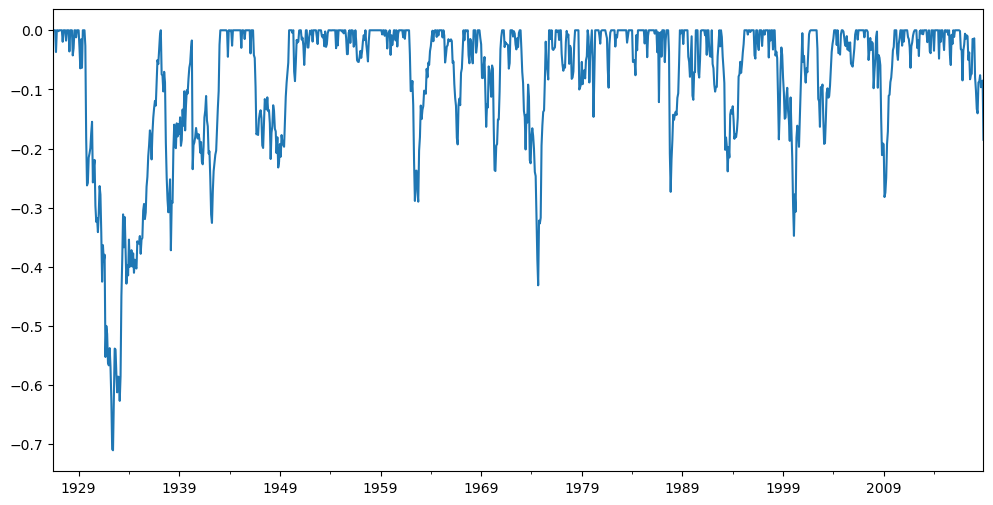

In [15]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [16]:
erk.VaR_gaussian(ind[["Food","Smoke","Coal", "Beer","Fin"]], modified=True)

Food     0.062690
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.089623
dtype: float64

In [17]:
erk.VaR_gaussian(ind["Telcm"],modified=True)

0.06471850278623081

<AxesSubplot: >

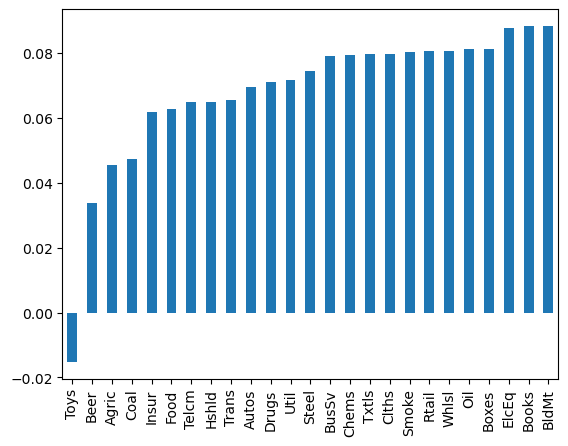

In [18]:
erk.VaR_gaussian(ind, modified=True).sort_values()[:25].plot.bar()

<AxesSubplot: title={'center': 'Industry Sharpe Ratios 2000-2018'}>

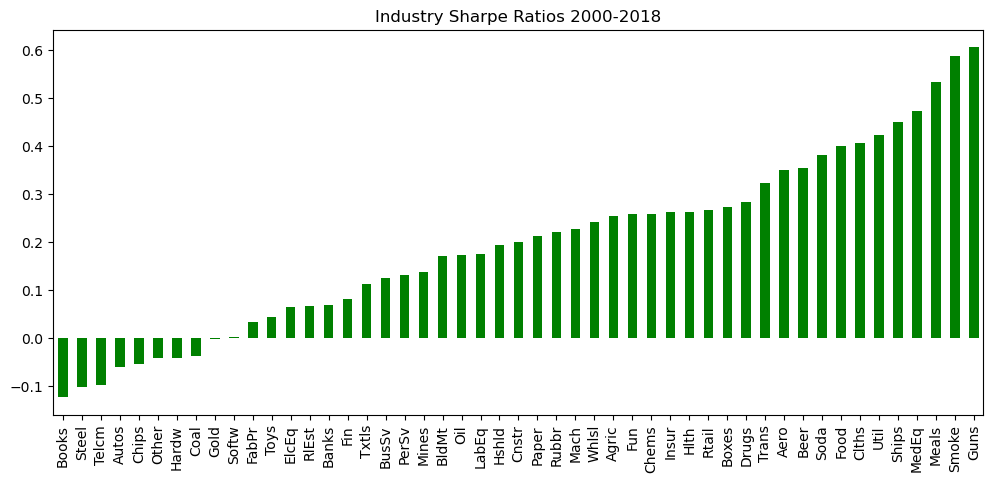

In [19]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 2000-2018",figsize=(12,5), color = "green")

negativ sharpe ratio is not good, Returns are lower than the Risk free rate

# compute the efficient frontier
Need:
- A set of expected Returns
- The mean in covariance matrix

In [26]:
# Expected Returns
# what was the efficient frontier over the period?
expected_r = erk.annualize_returns(ind["1995":"2000"],12)

<AxesSubplot: >

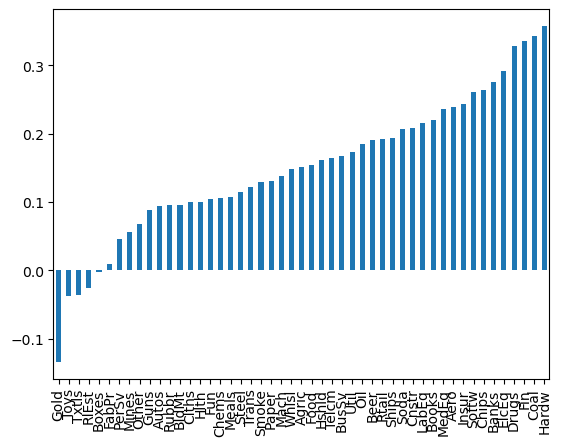

In [27]:
expected_r.sort_values().plot.bar()

In [30]:
# Generate the Covariance Matrix
cov = ind["1995":"2000"].cov()
cov.shape

(49, 49)

In [32]:
cov.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.004342,0.000563,0.000228,0.000189,0.000056,0.001020,0.000419,0.001011,0.000429,0.001161,...,0.001401,0.000700,0.000598,0.001081,0.000603,0.000968,0.000791,0.001152,0.001874,0.000666
Food,0.000563,0.002504,0.001705,0.002044,0.001891,0.001150,0.000639,0.000831,0.001137,0.001453,...,0.001493,0.001267,0.000601,0.001170,0.001081,0.001981,0.002017,0.000688,0.001092,0.000982
Soda,0.000228,0.001705,0.008989,0.003672,0.001277,0.001532,0.001077,0.001459,0.002666,0.002153,...,0.002345,0.002550,0.001447,0.001309,0.001542,0.002926,0.002413,0.001887,0.002437,0.001977
Beer,0.000189,0.002044,0.003672,0.004599,0.001143,0.001564,0.001113,0.000755,0.002447,0.001415,...,0.001603,0.001975,0.000609,0.001442,0.001634,0.002398,0.002379,0.000996,0.001767,0.001533
Smoke,0.000056,0.001891,0.001277,0.001143,0.007130,0.001417,0.000201,-0.000183,0.000981,0.000761,...,0.001631,0.000244,0.001363,0.000069,0.000590,0.001207,0.001255,0.000467,0.000550,0.001101


# $R_p = w^T.R$

In [35]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

#  $Vol = \sigma = \sqrt{w^T.\Sigma.w}$

In [36]:
def portfolio_vol(weights, covmat):
    """
    weights -> vol
    """
    
    return (weights.T @ covmat @ weights)**0.5

In [38]:
l =["Food", "Beer", "Smoke", "Coal"]
expected_r[l]

Food     0.154100
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [39]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002504,0.002044,0.001891,-0.000265
Beer,0.002044,0.004599,0.001143,0.001261
Smoke,0.001891,0.001143,0.007130,-0.000544
Coal,-0.000265,0.001261,-0.000544,0.016153


In [42]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [43]:
erk.portfolio_return(weights, expected_r[l])

0.20415264004016737

In [44]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.05089495548109203

# 2 Asset Frontier

In [60]:
l = ["Gold", "Fin"]
expected_r[l]

Gold   -0.133422
Fin     0.334837
dtype: float64

In [63]:
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points) ]
weights[19]

array([1., 0.])

In [58]:
rets = [erk.portfolio_return(w, expected_r[l]) for w in weights]

In [67]:
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]

<AxesSubplot: xlabel='Vol', ylabel='R'>

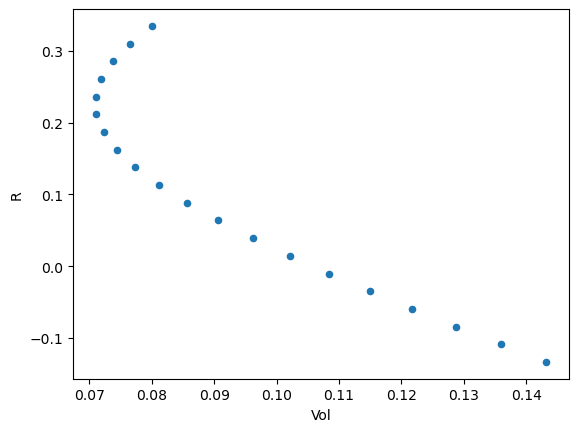

In [72]:
ef = pd.DataFrame({"R": rets,
                   "Vol":vol,
    
})
ef.plot.scatter(x='Vol', y='R')

<AxesSubplot: xlabel='Volatility'>

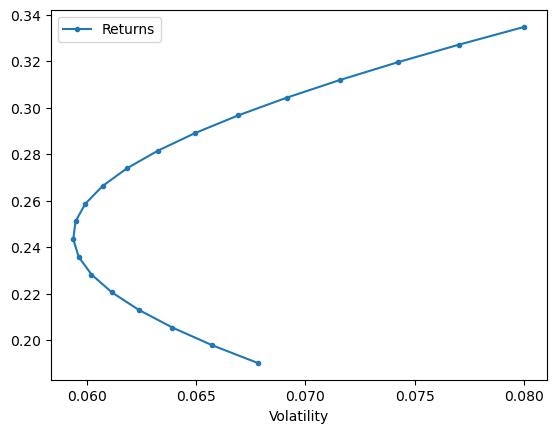

In [99]:
l = ["Fin", "Beer"]
erk.plot_ef2(20, expected_r[l], cov.loc[l,l])